<a href="https://colab.research.google.com/github/EAFIT-BI/Supervised-Learning-2024-II/blob/main/Redes_neuronales_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales

## Vectorización

Un elemento importante de los *frameworks* de trabajo para redes neuronales y es la **vectorización**. Para entender este concepto, haremos un ejemplo

In [1]:
#por ejemplo, para el cálculo de la red entrada de un perceptrón

#definimos, por ejemplo, tres entradas

x0, x1, x2 = 1., 2., 3.
bias, w1, w2 = 0.1, 0.2, 0.3

x = [x0, x1, x2]
w = [bias, w1, w2]
#si fuésemos a calcular la salida de forma tradicional, tendríamos que usar
#un ciclo


z = 0 #inicializamos la salida con 0

for i in range(len(x)):
    z += x[i]*w[i]

print(z)

1.4


In [2]:
#por comprehension (sigue siendo una operación no vectorizada pero
#se resume en una sola línea de código)

z = sum(x_i * w_i for x_i, w_i in zip(x, w))
print(z)

1.4


In [3]:
#en forma de vectorización, se haría así (trabajo en paralelo)
import numpy as np

#inicialmente, x y w son listas, necesitamos convertirlas en arreglos numéricos
x_vec, w_vec = np.array(x), np.array(w)

z = np.dot(x_vec, w_vec)
print(z)

1.4


## Implementación de un perceptrón con `PyTorch`

In [4]:
#importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [5]:
#cargamos la base de datos
data = np.genfromtxt('perceptron_toydata.txt', delimiter = '\t')

In [6]:
#separamos los datos de la etiqueta
X, y = data[:, :2], data[:, 2]

#castiamos el tipo de dato de y para que sea entero
y = y.astype(int)

In [7]:
#vamos a generar la partición para train y test
#primero generamos los índices aleatorios para cada conjunto
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(seed = 123)
shuffle_rng.shuffle(shuffle_idx)

#reasignamos X e y
X, y = X[shuffle_idx], y[shuffle_idx]

#generamos la separación de los conjuntos
X_train, y_train = X[shuffle_idx[:70]], y[shuffle_idx[:70]]
X_test, y_test = X[shuffle_idx[70:]], y[shuffle_idx[70:]]

In [8]:
#aplicamos estandarización como preprocesamiento
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#graficamos  para observar la distribución de los datos
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
            label = 'Clase 0', marker = 'o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
            label = 'Clase 1', marker = 's')
plt.title('Datos de entrenamiento')
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

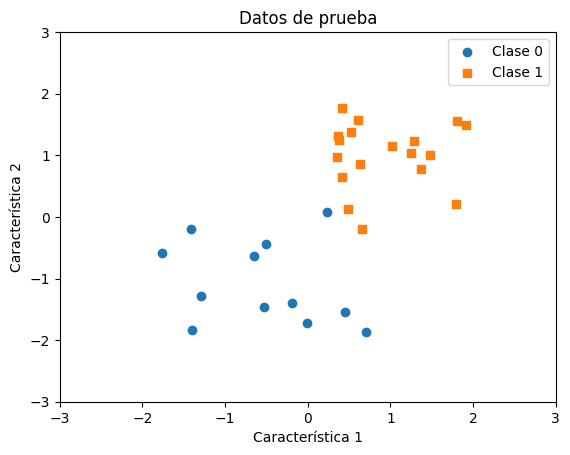

In [10]:
#graficamos  para observar la distribución de los datos
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            label = 'Clase 0', marker = 'o')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            label = 'Clase 1', marker = 's')
plt.title('Datos de prueba')
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()